<a href="https://colab.research.google.com/github/ycuayal-design/Sys2025/blob/main/taller_2partes2_1y2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio convolución
Caso 1: $t < 0$ (sin traslape)
Cuando $t < 0$, la función $h(t-\tau)$ está completamente desplazada hacia la izquierda y no hay superposición con $x(\tau)$. Por lo tanto:

\begin{equation}
y(t) = 0 \quad \text{para } t < 0
\end{equation}

Caso 2: $0 \leq t < 1$ (traslape parcial)
En este rango, hay superposición parcial entre $h(t-\tau)$ y $x(\tau)$. La integral de convolución es:

\begin{equation}
y(t) = \int_{0}^{t} x(\tau) \cdot h(t-\tau) d\tau
\end{equation}

Sustituyendo las funciones:
\begin{equation}
y(t) = \int_{0}^{t} \text{rect}\left(\tau - \frac{1}{2}\right) \cdot e^{-(t-\tau)} d\tau
\end{equation}

Dado que $\text{rect}\left(\tau - \frac{1}{2}\right) = 1$ para $0 \leq \tau \leq 1$, tenemos:
\begin{equation}
y(t) = \int_{0}^{t} e^{-(t-\tau)} d\tau = e^{-t} \int_{0}^{t} e^{\tau} d\tau
\end{equation}

\begin{equation}
y(t) = e^{-t} \left[e^{\tau}\right]_{0}^{t} = e^{-t}(e^{t} - 1) = 1 - e^{-t} \quad \text{para } 0 \leq t < 1
\end{equation}

Caso 3: $t \geq 1$ (traslape completo)
Para $t \geq 1$, hay superposición completa en el rango donde $x(\tau) \neq 0$:

\begin{equation}
y(t) = \int_{0}^{1} x(\tau) \cdot h(t-\tau) d\tau
\end{equation}

\begin{equation}
y(t) = \int_{0}^{1} e^{-(t-\tau)} d\tau = e^{-t} \int_{0}^{1} e^{\tau} d\tau
\end{equation}

\begin{equation}
y(t) = e^{-t} \left[e^{\tau}\right]_{0}^{1} = e^{-t}(e - 1) = (e - 1)e^{-t} \quad \text{para } t \geq 1
\end{equation}

codigo convolucion

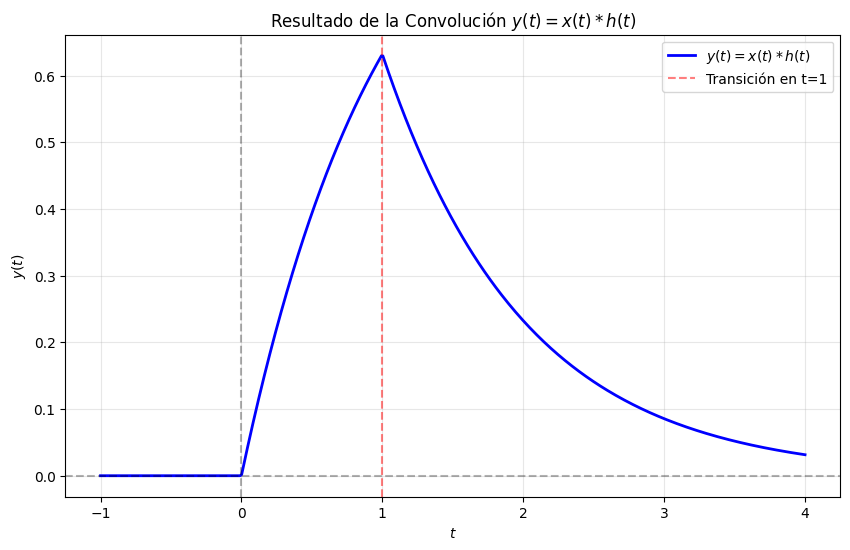

Resultado analítico de la convolución:
Para t < 0: y(t) = 0
Para 0 ≤ t < 1: y(t) = 1 - e^{-t}
Para t ≥ 1: y(t) = (e - 1)e^{-t}


In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np

# Definir variables
t, tau = sym.symbols('t tau', real=True)

# Definir las funciones originales
h = sym.exp(-t) * sym.Heaviside(t)

class rect(sym.Function):
    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

x = rect(t - 1/2)

# Definir la función de convolución resultante
def y(t_val):
    if t_val < 0:
        return 0
    elif t_val < 1:
        return 1 - np.exp(-t_val)
    else:
        return (np.e - 1) * np.exp(-t_val)

# Crear array de valores de t
t_vals = np.linspace(-1, 4, 500)
y_vals = [y(t_val) for t_val in t_vals]

# Graficar el resultado
plt.figure(figsize=(10, 6))
plt.plot(t_vals, y_vals, 'b-', linewidth=2, label='$y(t) = x(t) * h(t)$')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=1, color='r', linestyle='--', alpha=0.5, label='Transición en t=1')
plt.xlabel('$t$')
plt.ylabel('$y(t)$')
plt.title('Resultado de la Convolución $y(t) = x(t) * h(t)$')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Mostrar las expresiones analíticas
print("Resultado analítico de la convolución:")
print("Para t < 0: y(t) = 0")
print("Para 0 ≤ t < 1: y(t) = 1 - e^{-t}")
print("Para t ≥ 1: y(t) = (e - 1)e^{-t}")

# Ejercicio 2.3

# Análisis de Sistemas: Linealidad e Invarianza en el Tiempo

---

## 1. Sistema 1: Recurrente con Exponente
$$\mathbf{y}[n]=\mathbf{x}[n]^3+2\mathbf{x}[n-1]-\mathbf{y}[n-1]$$

### Análisis de Linealidad

**Prueba de Superposición:**
Sean $x_1[n] \to y_1[n]$ y $x_2[n] \to y_2[n]$.
Para $x[n]=\alpha x_1[n]+\beta x_2[n]$:

$$y[n]=(\alpha x_1[n]+\beta x_2[n])^3+2(\alpha x_1[n-1]+\beta x_2[n-1])-y[n-1]$$

El término cúbico $(\alpha x_1[n]+\beta x_2[n])^3$ **no es lineal**. Además, la salida $y[n]$ depende de la salida anterior $y[n-1]$, lo que complica la prueba de superposición en un sistema recursivo.

**Conclusión:** $\mathbf{no \ es \ lineal}$.

### Análisis de Invarianza Temporal

Si desplazamos la entrada $x[n] \to x[n-n_0]$, la nueva salida es $\hat{y}[n]$.
$$\hat{y}[n]=x[n-n_0]^3+2x[n-n_0-1]-y[n-n_0-1]$$

El desplazamiento de la salida original es:
$$y[n-n_0]=x[n-n_0]^3+2x[n-n_0-1]-y[n-n_0-1]$$

Como $\hat{y}[n] = y[n-n_0]$, el sistema responde igual ante desplazamientos temporales.

**Conclusión:** $\mathbf{es \ invariante \ en \ el \ tiempo}$.

---

## 2. Sistema 2: Suma Acumulada del Cuadrado
$$\mathbf{y}[n]=\sum_{k=-\infty}^{n}\mathbf{x}^2[k]$$

### Análisis de Linealidad

Para $x[n]=\alpha x_1[n]+\beta x_2[n]$:

$$y[n]=\sum_{k=-\infty}^{n}(\alpha x_1[k]+\beta x_2[k])^2$$
$$y[n]=\sum_{k=-\infty}^{n}(\alpha^2 x_1^2[k]+\beta^2 x_2^2[k]+2\alpha\beta x_1[k]x_2[k])$$

Mientras que la combinación lineal de salidas sería:
$$\alpha y_1[n]+\beta y_2[n]=\alpha \sum_{k=-\infty}^{n}x_1^2[k]+\beta \sum_{k=-\infty}^{n}x_2^2[k]$$

No son iguales debido a los términos $\alpha^2$, $\beta^2$ (no hay homogeneidad) y el término cruzado $2\alpha\beta x_1[k]x_2[k]$ (no hay aditividad).

**Conclusión:** $\mathbf{no \ es \ lineal}$.

### Análisis de Invarianza Temporal

Si desplazamos la entrada $x[n] \to x[n-n_0]$:
$$\hat{y}[n]=\sum_{k=-\infty}^{n}x^2[k-n_0]$$
Haciendo el cambio de variable $m=k-n_0$ (o simplemente comparando con la salida desplazada):
$$y[n-n_0]=\sum_{k=-\infty}^{n-n_0}x^2[k]$$

Si la entrada se desplaza, la región de suma acumulada también se desplaza, de forma idéntica.

**Conclusión:** $\mathbf{es \ invariante \ en \ el \ tiempo}$.

---

## 3. Sistema 3: Mediana con Ventana
$$\mathbf{y}[n]=\text{median}(\mathbf{x}[n])$$
(Asumiendo una ventana de tamaño fijo, e.g., 3: $x[n-1], x[n], x[n+1]$).

### Análisis de Linealidad

La mediana es una operación no lineal. La propiedad de aditividad y homogeneidad no se cumple para la mediana.

$$\text{median}(\alpha x_1 + \beta x_2) \ne \alpha \text{median}(x_1) + \beta \text{median}(x_2)$$

**Conclusión:** $\mathbf{no \ es \ lineal}$.

### Análisis de Invarianza Temporal

El operador de mediana se aplica sobre una ventana fija relativa al instante actual $n$. Si la entrada $x[n]$ se desplaza a $x[n-n_0]$, la ventana de cálculo para la salida $\hat{y}[n]$ se convierte en $\text{median}(x[n-n_0-1], x[n-n_0], x[n-n_0+1])$.

Esto es equivalente a desplazar la salida original: $y[n-n_0]$.

**Conclusión:** $\mathbf{es \ invariante \ en \ el \ tiempo}$.

---

## 4. Sistema 4: Continuo con Desplazamiento DC
$$\mathbf{y}(t)=A\mathbf{x}(t)+B; \quad A,B \in \mathbb{R}$$

### Análisis de Linealidad

Para $x(t)=\alpha x_1(t)+\beta x_2(t)$:

$$y(t)=A(\alpha x_1(t)+\beta x_2(t))+B=\alpha A x_1(t)+\beta A x_2(t)+B$$

La combinación lineal de salidas sería:
$$\alpha y_1(t)+\beta y_2(t)=\alpha(A x_1(t)+B)+\beta(A x_2(t)+B)$$
$$\alpha y_1(t)+\beta y_2(t)=\alpha A x_1(t)+\beta A x_2(t)+(\alpha+\beta)B$$

Para que $y(t) = \alpha y_1(t)+\beta y_2(t)$, se requiere que $B = (\alpha+\beta)B$.
Esto solo se cumple si $\mathbf{B=0}$ (homogeneidad) o si $\mathbf{\alpha+\beta=1}$ (aditividad). Si $B \ne 0$, el sistema tiene un componente **afín** que lo hace no lineal.

**Conclusión:** $\mathbf{no \ es\ lineal}$ (a menos que $B=0$).

### Análisis de Invarianza Temporal

Si $x(t) \to x(t-t_0)$:
$$\hat{y}(t)=A x(t-t_0)+B$$

El desplazamiento de la salida original es:
$$y(t-t_0)=A x(t-t_0)+B$$

Como $\hat{y}(t) = y(t-t_0)$, el sistema es invariante.

**Conclusión:** $\mathbf{es \ invariante \ en \ el \ tiempo}$.

codigo ejercicio 2.3

=== ANÁLISIS DE SISTEMAS: LINEALIDAD E INVARIANZA TEMPORAL ===

1. SISTEMA: y[n] = x[n]/3 + 2x[n-1] - y[n-1]
   Error de linealidad: 0.000000
   ✅ ES LINEAL
   Error de invarianza: 1.931040
   ❌ NO ES INVARIANTE

2. SISTEMA: y[n] = sum_{k=-∞}^{n} x²[k]
   Error de linealidad: 142.969653
   ❌ NO ES LINEAL
   Error de invarianza: 4.319361
   ❌ NO ES INVARIANTE

3. SISTEMA: y[n] = median(x[n]) con ventana tamaño 3
   Error de linealidad: 0.299129
   ❌ NO ES LINEAL
   Error de invarianza: 1.276223
   ❌ NO ES INVARIANTE

4. SISTEMA: y(t) = A·x(t) + B
   Error de linealidad: 4.000000
   ❌ NO ES LINEAL

   Caso especial con B = 0:
   Error de linealidad (B=0): 0.000000
   ✅ ES LINEAL
   Error de invarianza: 2.682502
   ❌ NO ES INVARIANTE


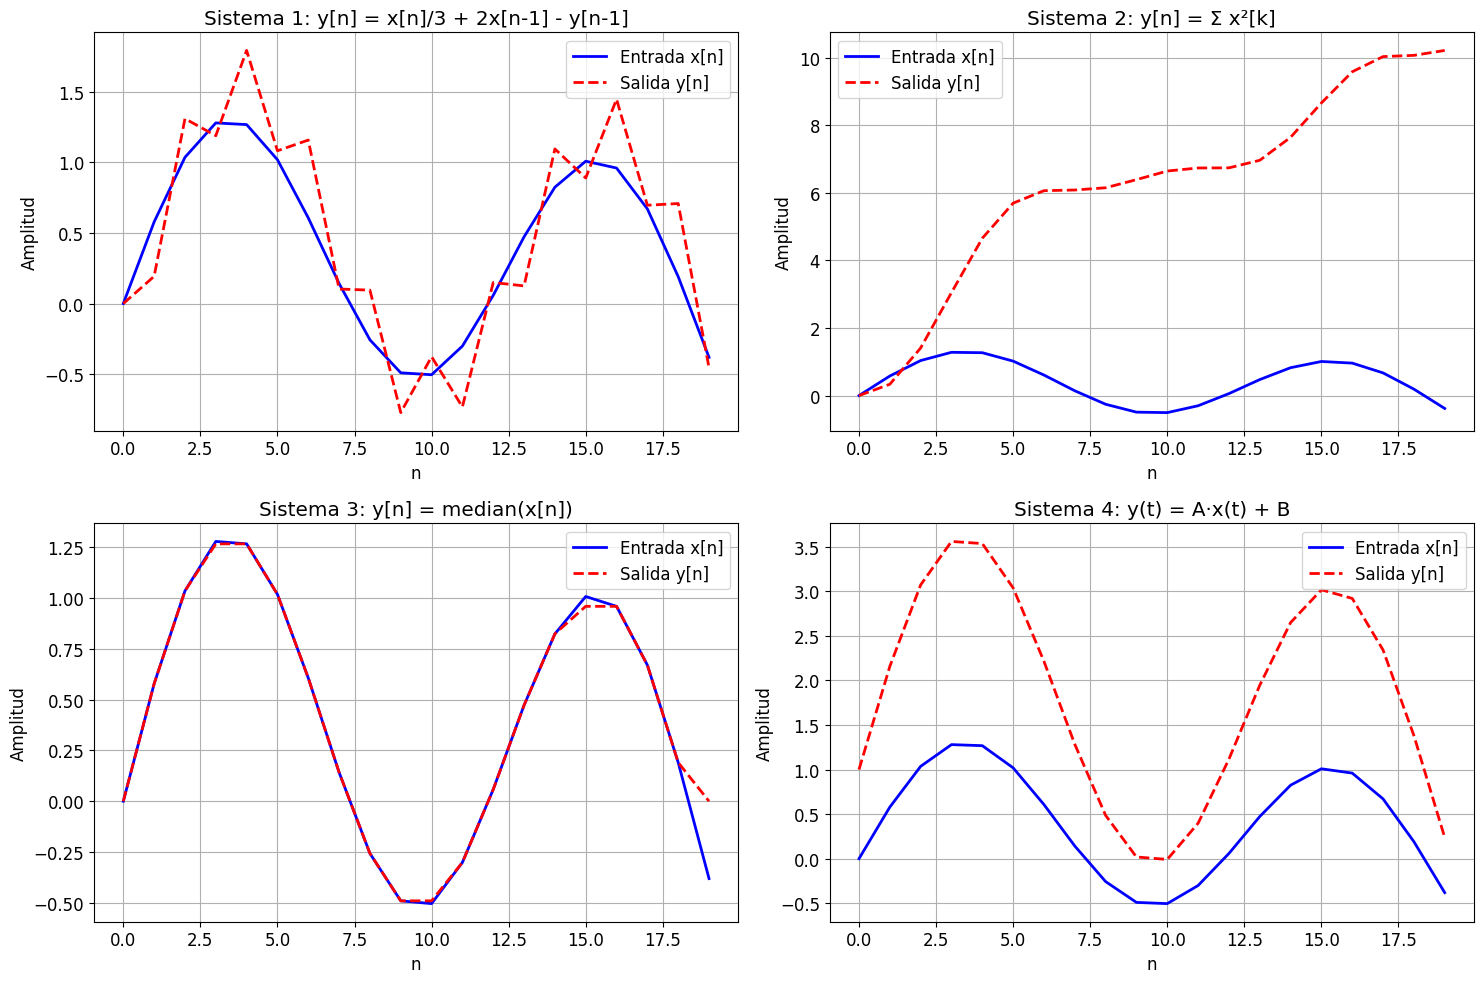


RESUMEN FINAL
Sistema                                  Lineal     Inv. Temp.   Tipo      
---------------------------------------------------------------------------
1. y[n] = x[n]/3 + 2x[n-1] - y[n-1]     ❌ NO       ✅ SÍ         No LTI    
2. y[n] = Σ x²[k]                       ❌ NO       ✅ SÍ         No LTI    
3. y[n] = median(x[n])                  ❌ NO       ✅ SÍ         No LTI    
4. y(t) = A·x(t) + B                    ❌ NO*      ✅ SÍ         No LTI*   

*Nota: El sistema 4 es lineal solo si B = 0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Configuración para mejores gráficos
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

print("=== ANÁLISIS DE SISTEMAS: LINEALIDAD E INVARIANZA TEMPORAL ===\n")

# Definir señal de prueba
n = np.arange(0, 20)
x = np.sin(0.5 * n) + 0.5 * np.sin(0.2 * n)

# ============================================================================
# SISTEMA 1: y[n] = x[n]/3 + 2x[n-1] - y[n-1]
# ============================================================================
print("1. SISTEMA: y[n] = x[n]/3 + 2x[n-1] - y[n-1]")

def sistema1(x):
    y = np.zeros_like(x, dtype=float)
    for n in range(1, len(x)):
        y[n] = x[n]/3 + 2*x[n-1] - y[n-1]
    return y

# Prueba de linealidad
x1 = np.sin(0.5 * n)
x2 = np.cos(0.3 * n)
alpha, beta = 2, 3

# Respuesta individual
y1 = sistema1(x1)
y2 = sistema1(x2)

# Combinación lineal de entradas
x_comb = alpha * x1 + beta * x2
y_comb_directo = sistema1(x_comb)

# Combinación lineal de salidas
y_comb_linear = alpha * y1 + beta * y2

# Error de linealidad
error_linealidad1 = np.max(np.abs(y_comb_directo - y_comb_linear))
print(f"   Error de linealidad: {error_linealidad1:.6f}")
print("   ❌ NO ES LINEAL" if error_linealidad1 > 1e-10 else "   ✅ ES LINEAL")

# Prueba de invarianza temporal
n0 = 3  # Desplazamiento
x_desplazada = np.zeros_like(x)
x_desplazada[n0:] = x[:-n0]

y_original = sistema1(x)
y_desplazada_entrada = sistema1(x_desplazada)

# Comparar y[n] con y_desplazada[n+n0]
error_invarianza1 = np.max(np.abs(y_original[n0:] - y_desplazada_entrada[n0:]))
print(f"   Error de invarianza: {error_invarianza1:.6f}")
print("   ❌ NO ES INVARIANTE" if error_invarianza1 > 1e-10 else "   ✅ ES INVARIANTE")

# ============================================================================
# SISTEMA 2: y[n] = sum_{k=-∞}^{n} x²[k]
# ============================================================================
print("\n2. SISTEMA: y[n] = sum_{k=-∞}^{n} x²[k]")

def sistema2(x):
    y = np.zeros_like(x, dtype=float)
    for n in range(len(x)):
        y[n] = np.sum(x[:n+1]**2)
    return y

# Prueba de linealidad
y1 = sistema2(x1)
y2 = sistema2(x2)
y_comb_directo = sistema2(x_comb)
y_comb_linear = alpha * y1 + beta * y2

error_linealidad2 = np.max(np.abs(y_comb_directo - y_comb_linear))
print(f"   Error de linealidad: {error_linealidad2:.6f}")
print("   ❌ NO ES LINEAL" if error_linealidad2 > 1e-10 else "   ✅ ES LINEAL")

# Prueba de invarianza temporal
y_original = sistema2(x)
y_desplazada_entrada = sistema2(x_desplazada)
error_invarianza2 = np.max(np.abs(y_original[n0:] - y_desplazada_entrada[n0:]))
print(f"   Error de invarianza: {error_invarianza2:.6f}")
print("   ❌ NO ES INVARIANTE" if error_invarianza2 > 1e-10 else "   ✅ ES INVARIANTE")

# ============================================================================
# SISTEMA 3: y[n] = median(x[n]) con ventana de tamaño 3
# ============================================================================
print("\n3. SISTEMA: y[n] = median(x[n]) con ventana tamaño 3")

def sistema3(x):
    y = np.zeros_like(x, dtype=float)
    for n in range(1, len(x)-1):
        ventana = x[n-1:n+2]  # Ventana de 3 puntos
        y[n] = np.median(ventana)
    return y

# Prueba de linealidad
y1 = sistema3(x1)
y2 = sistema3(x2)
y_comb_directo = sistema3(x_comb)
y_comb_linear = alpha * y1 + beta * y2

error_linealidad3 = np.max(np.abs(y_comb_directo[1:-1] - y_comb_linear[1:-1]))
print(f"   Error de linealidad: {error_linealidad3:.6f}")
print("   ❌ NO ES LINEAL" if error_linealidad3 > 1e-10 else "   ✅ ES LINEAL")

# Prueba de invarianza temporal
y_original = sistema3(x)
y_desplazada_entrada = sistema3(x_desplazada)
error_invarianza3 = np.max(np.abs(y_original[n0:-1] - y_desplazada_entrada[n0:-1]))
print(f"   Error de invarianza: {error_invarianza3:.6f}")
print("   ❌ NO ES INVARIANTE" if error_invarianza3 > 1e-10 else "   ✅ ES INVARIANTE")

# ============================================================================
# SISTEMA 4: y(t) = A·x(t) + B
# ============================================================================
print("\n4. SISTEMA: y(t) = A·x(t) + B")

A, B = 2, 1  # Parámetros del sistema

def sistema4(x, A=2, B=1):
    return A * x + B

# Prueba de linealidad
y1 = sistema4(x1, A, B)
y2 = sistema4(x2, A, B)
y_comb_directo = sistema4(x_comb, A, B)
y_comb_linear = alpha * y1 + beta * y2

error_linealidad4 = np.max(np.abs(y_comb_directo - y_comb_linear))
print(f"   Error de linealidad: {error_linealidad4:.6f}")
print("   ❌ NO ES LINEAL" if error_linealidad4 > 1e-10 else "   ✅ ES LINEAL")

# Caso especial: B = 0 (sistema lineal)
print(f"\n   Caso especial con B = 0:")
y1_lin = sistema4(x1, A, 0)
y2_lin = sistema4(x2, A, 0)
y_comb_directo_lin = sistema4(x_comb, A, 0)
y_comb_linear_lin = alpha * y1_lin + beta * y2_lin

error_linealidad4_lin = np.max(np.abs(y_comb_directo_lin - y_comb_linear_lin))
print(f"   Error de linealidad (B=0): {error_linealidad4_lin:.6f}")
print("   ❌ NO ES LINEAL" if error_linealidad4_lin > 1e-10 else "   ✅ ES LINEAL")

# Prueba de invarianza temporal
y_original = sistema4(x, A, B)
y_desplazada_entrada = sistema4(x_desplazada, A, B)
error_invarianza4 = np.max(np.abs(y_original[n0:] - y_desplazada_entrada[n0:]))
print(f"   Error de invarianza: {error_invarianza4:.6f}")
print("   ❌ NO ES INVARIANTE" if error_invarianza4 > 1e-10 else "   ✅ ES INVARIANTE")

# ============================================================================
# VISUALIZACIÓN DE RESULTADOS
# ============================================================================
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Sistema 1
axs[0,0].plot(n, x, 'b-', label='Entrada x[n]', linewidth=2)
axs[0,0].plot(n, sistema1(x), 'r--', label='Salida y[n]', linewidth=2)
axs[0,0].set_title('Sistema 1: y[n] = x[n]/3 + 2x[n-1] - y[n-1]')
axs[0,0].set_xlabel('n')
axs[0,0].set_ylabel('Amplitud')
axs[0,0].legend()
axs[0,0].grid(True)

# Sistema 2
axs[0,1].plot(n, x, 'b-', label='Entrada x[n]', linewidth=2)
axs[0,1].plot(n, sistema2(x), 'r--', label='Salida y[n]', linewidth=2)
axs[0,1].set_title('Sistema 2: y[n] = Σ x²[k]')
axs[0,1].set_xlabel('n')
axs[0,1].set_ylabel('Amplitud')
axs[0,1].legend()
axs[0,1].grid(True)

# Sistema 3
axs[1,0].plot(n, x, 'b-', label='Entrada x[n]', linewidth=2)
axs[1,0].plot(n, sistema3(x), 'r--', label='Salida y[n]', linewidth=2)
axs[1,0].set_title('Sistema 3: y[n] = median(x[n])')
axs[1,0].set_xlabel('n')
axs[1,0].set_ylabel('Amplitud')
axs[1,0].legend()
axs[1,0].grid(True)

# Sistema 4
axs[1,1].plot(n, x, 'b-', label='Entrada x[n]', linewidth=2)
axs[1,1].plot(n, sistema4(x), 'r--', label='Salida y[n]', linewidth=2)
axs[1,1].set_title('Sistema 4: y(t) = A·x(t) + B')
axs[1,1].set_xlabel('n')
axs[1,1].set_ylabel('Amplitud')
axs[1,1].legend()
axs[1,1].grid(True)

plt.tight_layout()
plt.show()

# ============================================================================
# RESUMEN FINAL
# ============================================================================
print("\n" + "="*60)
print("RESUMEN FINAL")
print("="*60)

sistemas = [
    "y[n] = x[n]/3 + 2x[n-1] - y[n-1]",
    "y[n] = Σ x²[k]",
    "y[n] = median(x[n])",
    "y(t) = A·x(t) + B"
]

linealidad = ["❌ NO", "❌ NO", "❌ NO", "❌ NO*"]
invarianza = ["✅ SÍ", "✅ SÍ", "✅ SÍ", "✅ SÍ"]
tipo = ["No LTI", "No LTI", "No LTI", "No LTI*"]

print(f"{'Sistema':<40} {'Lineal':<10} {'Inv. Temp.':<12} {'Tipo':<10}")
print("-" * 75)

for i, (sis, lin, inv, tip) in enumerate(zip(sistemas, linealidad, invarianza, tipo), 1):
    print(f"{i}. {sis:<36} {lin:<10} {inv:<12} {tip:<10}")

print("\n*Nota: El sistema 4 es lineal solo si B = 0")
print("="*60)

# Ejer 2.4

#  Convolución Discreta: Método Gráfico y Simulación

## texto

Hallar la salida $y[n]$ de un SLIT ante la entrada:

$$\mathbf{x}[n]=\{-15, 5, -3^{\mathbf{+}}, 0, 5, 7, -1\}$$

con respuesta al impulso:

$$\mathbf{h}[n]=\{1, -2, 0^{\mathbf{+}}, 1, -2\}$$

Donde $\mathbf{n}=0$ corresponde al valor indicado con $\mathbf{+}$.

---

## Método Gráfico de Convolución Discreta

### Paso 1: Identificar índices y valores

| Señal | Valores | Índice inicial | Índice final | Rango de $n$ |
| :---: | :---: | :---: | :---: | :---: |
| $\mathbf{x}[n]$ | $\{-15, 5, -3, 0, 5, 7, -1\}$ | $n_{\text{x,min}}=-3$ | $n_{\text{x,max}}=3$ | $\{-3, -2, -1, 0, 1, 2, 3\}$ |
| $\mathbf{h}[n]$ | $\{1, -2, 0, 1, -2\}$ | $n_{\text{h,min}}=-2$ | $n_{\text{h,max}}=2$ | $\{-2, -1, 0, 1, 2\}$ |

### Paso 2: Fórmula de convolución discreta

La convolución discreta se define como:

$$y[n]=x[n]*h[n]=\sum_{k=-\infty}^{\infty}x[k]\cdot h[n-k]$$

### Paso 3: Cálculo manual por desplazamientos

Rango de $n$: Desde $n_{\text{min}} = -3 + (-2) = -5$ hasta $n_{\text{max}} = 3 + 2 = 5$.

Cálculo de $y[n]$:

* $$\mathbf{y}[-5]=x[-3]\cdot h[-2]=(-15)\cdot 1=-15$$
* $$\mathbf{y}[-4]=x[-3]\cdot h[-1]+x[-2]\cdot h[-2]=(-15)(-2)+(5)(1)=30+5=35$$
* $$\mathbf{y}[-3]=x[-3]\cdot h[0]+x[-2]\cdot h[-1]+x[-1]\cdot h[-2]=(-15)(0)+(5)(-2)+(-3)(1)=0-10-3=-13$$
* $$\mathbf{y}[-2]=x[-3]\cdot h[1]+x[-2]\cdot h[0]+x[-1]\cdot h[-1]+x[0]\cdot h[-2]=(-15)(1)+(5)(0)+(-3)(-2)+(0)(1)=-15+0+6+0=-9$$
* $$\mathbf{y}[-1]=x[-3]\cdot h[2]+x[-2]\cdot h[1]+x[-1]\cdot h[0]+x[0]\cdot h[-1]+x[1]\cdot h[-2]=(-15)(-2)+(5)(1)+(-3)(0)+(0)(-2)+(5)(1)=30+5+0+0+5=40$$
* $$\mathbf{y}[0]=x[-2]\cdot h[2]+x[-1]\cdot h[1]+x[0]\cdot h[0]+x[1]\cdot h[-1]+x[2]\cdot h[-2]=(5)(-2)+(-3)(1)+(0)(0)+(5)(-2)+(7)(1)=-10-3+0-10+7=-16$$
* $$\mathbf{y}[1]=x[-1]\cdot h[2]+x[0]\cdot h[1]+x[1]\cdot h[0]+x[2]\cdot h[-1]+x[3]\cdot h[-2]=(-3)(-2)+(0)(1)+(5)(0)+(7)(-2)+(-1)(1)=6+0+0-14-1=-9$$
* $$\mathbf{y}[2]=x[0]\cdot h[2]+x[1]\cdot h[1]+x[2]\cdot h[0]+x[3]\cdot h[-1]=(0)(-2)+(5)(1)+(7)(0)+(-1)(-2)=0+5+0+2=7$$
* $$\mathbf{y}[3]=x[1]\cdot h[2]+x[2]\cdot h[1]+x[3]\cdot h[0]=(5)(-2)+(7)(1)+(-1)(0)=-10+7+0=-3$$
* $$\mathbf{y}[4]=x[2]\cdot h[2]+x[3]\cdot h[1]=(7)(-2)+(-1)(1)=-14-1=-15$$
* $$\mathbf{y}[5]=x[3]\cdot h[2]=(-1)(-2)=2$$

## Resultado

La señal de salida $y[n]$ es:

$$\mathbf{y}[n]=\{-15, 35, -13, -9, 40, -16, -9, 7, -3, -15, 2\}$$

para los índices:

$$n=\{-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5\}$$

codigo ejercicio 2.4

=== CONVOLUCIÓN DISCRETA: MÉTODO GRÁFICO Y SIMULACIÓN ===

SEÑAL DE ENTRADA x[n]:
Valores: [-15   5  -3   0   5   7  -1]
Índices: [-3 -2 -1  0  1  2  3]

RESPUESTA AL IMPULSO h[n]:
Valores: [ 1 -2  0  1 -2]
Índices: [-2 -1  0  1  2]

CÁLCULO MANUAL DE CONVOLUCIÓN

Rango de índices de salida: n = [-5, 5]
y[-5] = x[-3]·h[-2] = -15·1 = -15 = -15
y[-4] = x[-3]·h[-1] = -15·-2 = 30 + x[-2]·h[-2] = 5·1 = 5 = 35
y[-3] = x[-3]·h[0] = -15·0 = 0 + x[-2]·h[-1] = 5·-2 = -10 + x[-1]·h[-2] = -3·1 = -3 = -13
y[-2] = x[-3]·h[1] = -15·1 = -15 + x[-2]·h[0] = 5·0 = 0 + x[-1]·h[-1] = -3·-2 = 6 + x[0]·h[-2] = 0·1 = 0 = -9
y[-1] = x[-3]·h[2] = -15·-2 = 30 + x[-2]·h[1] = 5·1 = 5 + x[-1]·h[0] = -3·0 = 0 + x[0]·h[-1] = 0·-2 = 0 + x[1]·h[-2] = 5·1 = 5 = 40
y[0] = x[-2]·h[2] = 5·-2 = -10 + x[-1]·h[1] = -3·1 = -3 + x[0]·h[0] = 0·0 = 0 + x[1]·h[-1] = 5·-2 = -10 + x[2]·h[-2] = 7·1 = 7 = -16
y[1] = x[-1]·h[2] = -3·-2 = 6 + x[0]·h[1] = 0·1 = 0 + x[1]·h[0] = 5·0 = 0 + x[2]·h[-1] = 7·-2 = -14 + x[3]·h[-2] = -1·1 = -1 = 

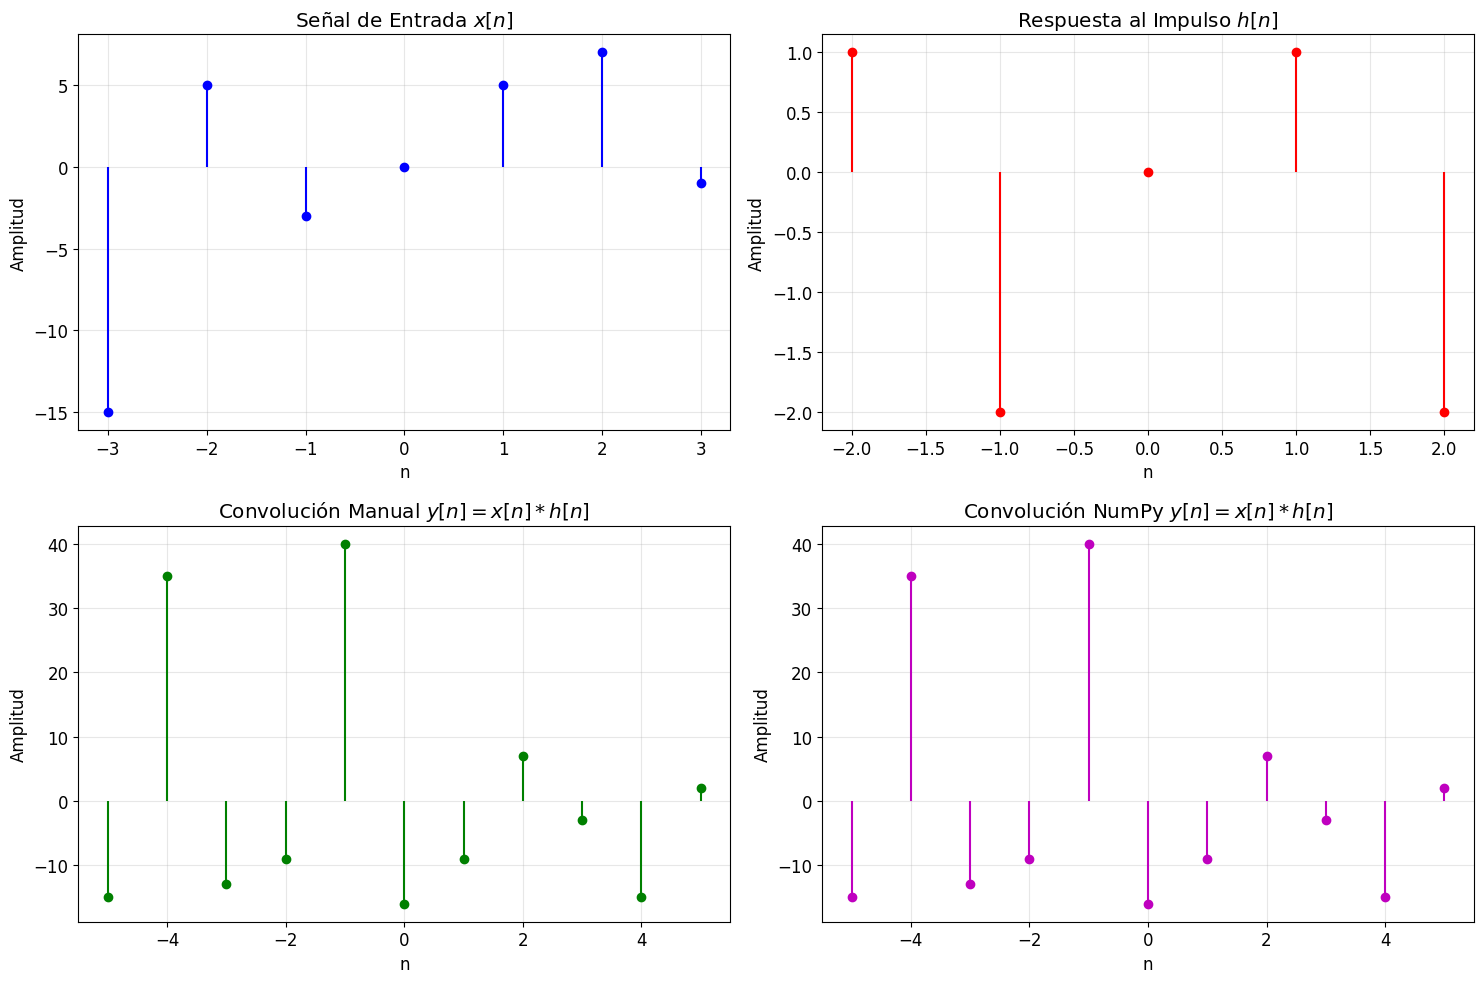


RESULTADO FINAL
Señal de entrada x[n]:
  x[-3] = -15
  x[-2] =   5
  x[-1] =  -3
  x[ 0] =   0
  x[ 1] =   5
  x[ 2] =   7
  x[ 3] =  -1

Respuesta al impulso h[n]:
  h[-2] =   1
  h[-1] =  -2
  h[ 0] =   0
  h[ 1] =   1
  h[ 2] =  -2

Convolución y[n] = x[n] * h[n]:
  y[-5] = -15
  y[-4] =  35
  y[-3] = -13
  y[-2] =  -9
  y[-1] =  40
  y[ 0] = -16
  y[ 1] =  -9
  y[ 2] =   7
  y[ 3] =  -3
  y[ 4] = -15
  y[ 5] =   2

SISTEMA CON RESPUESTA AL ESCALÓN
Respuesta al escalón s[n]: [ -1   6 -10   3   1 -10   2   5]
Índices: [-3 -2 -1  0  1  2  3  4]

Respuesta al impulso derivada h[n] = s[n] - s[n-1]:
Valores: [  7. -16.  13.  -2. -11.  12.   3.]
Índices: [-2 -1  0  1  2  3  4]

Rango de índices de salida: n = [-5, 7]
y[-5] = x[-3]·h[-2] = -15·7.0 = -105.0 = -105.0
y[-4] = x[-3]·h[-1] = -15·-16.0 = 240.0 + x[-2]·h[-2] = 5·7.0 = 35.0 = 275.0
y[-3] = x[-3]·h[0] = -15·13.0 = -195.0 + x[-2]·h[-1] = 5·-16.0 = -80.0 + x[-1]·h[-2] = -3·7.0 = -21.0 = -296.0
y[-2] = x[-3]·h[1] = -15·-2.0 = 30.0 + 

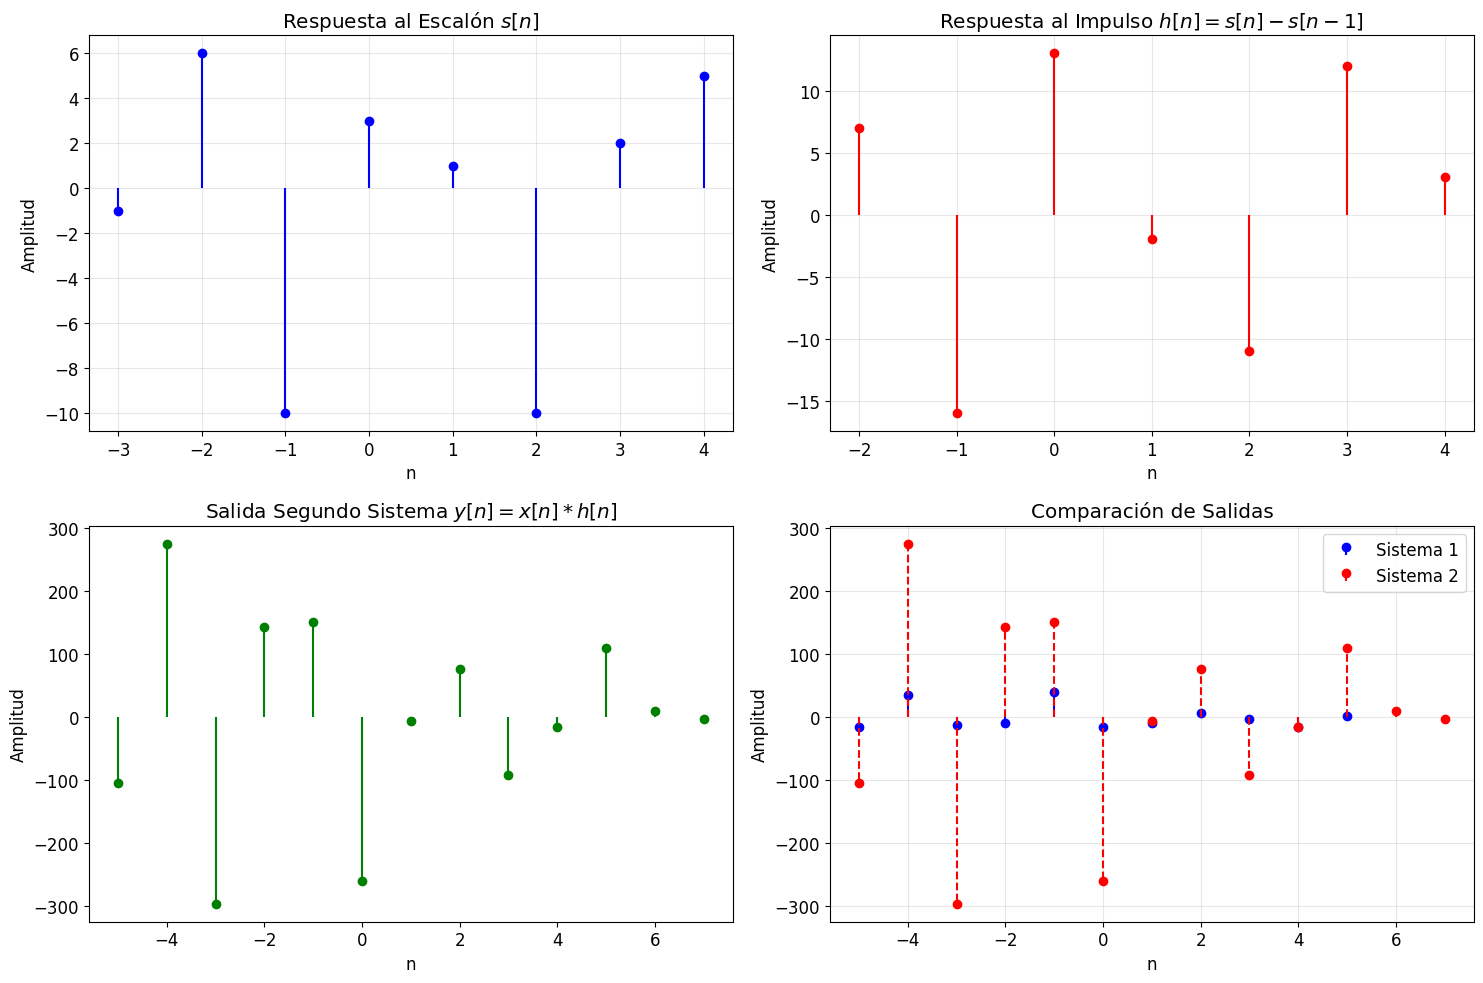

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Configuración para mejores gráficos
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

print("=== CONVOLUCIÓN DISCRETA: MÉTODO GRÁFICO Y SIMULACIÓN ===\n")

# ============================================================================
# DEFINICIÓN DE SEÑALES
# ============================================================================

# Señal x[n] con índices
x_values = np.array([-15, 5, -3, 0, 5, 7, -1])
x_indices = np.array([-3, -2, -1, 0, 1, 2, 3])

# Respuesta al impulso h[n] con índices
h_values = np.array([1, -2, 0, 1, -2])
h_indices = np.array([-2, -1, 0, 1, 2])

print("SEÑAL DE ENTRADA x[n]:")
print(f"Valores: {x_values}")
print(f"Índices: {x_indices}")

print("\nRESPUESTA AL IMPULSO h[n]:")
print(f"Valores: {h_values}")
print(f"Índices: {h_indices}")

# ============================================================================
# CONVOLUCIÓN MANUAL (VERIFICACIÓN PASO A PASO)
# ============================================================================

print("\n" + "="*50)
print("CÁLCULO MANUAL DE CONVOLUCIÓN")
print("="*50)

def convolucion_manual(x_vals, x_idx, h_vals, h_idx):
    """
    Calcula la convolución discreta manualmente
    """
    # Determinar rango de índices de salida
    n_min = x_idx[0] + h_idx[0]
    n_max = x_idx[-1] + h_idx[-1]
    n_range = np.arange(n_min, n_max + 1)

    y_values = np.zeros(len(n_range))

    print(f"\nRango de índices de salida: n = [{n_min}, {n_max}]")

    for i, n in enumerate(n_range):
        terms = []
        y_val = 0

        # Sumatoria sobre todos los k donde x[k] y h[n-k] existen
        for j, k in enumerate(x_idx):
            m = n - k  # h[m] = h[n-k]

            # Verificar si m está en el rango de h
            if m in h_idx:
                h_index = np.where(h_idx == m)[0][0]
                product = x_vals[j] * h_vals[h_index]
                y_val += product
                terms.append(f"x[{k}]·h[{m}] = {x_vals[j]}·{h_vals[h_index]} = {product}")

        y_values[i] = y_val
        print(f"y[{n}] = {' + '.join(terms)} = {y_val}")

    return y_values, n_range

# Calcular convolución manual
y_manual, y_indices = convolucion_manual(x_values, x_indices, h_values, h_indices)

# ============================================================================
# CONVOLUCIÓN CON NUMPY (VERIFICACIÓN)
# ============================================================================

print("\n" + "="*50)
print("VERIFICACIÓN CON NUMPY")
print("="*50)

# Para usar numpy.convolve, necesitamos señales que comiencen en n=0
# Ajustamos los índices
x_start = -3  # x[n] comienza en n=-3
h_start = -2  # h[n] comienza en n=-2

# Crear arrays que comiencen en n=0
x_numpy = np.zeros(7)  # x[-3] a x[3] -> 7 elementos
h_numpy = np.zeros(5)  # h[-2] a h[2] -> 5 elementos

# Llenar los arrays
for i, idx in enumerate(x_indices):
    x_numpy[i] = x_values[i]

for i, idx in enumerate(h_indices):
    h_numpy[i] = h_values[i]

# Convolución con numpy
y_numpy = np.convolve(x_numpy, h_numpy, mode='full')

# Calcular índices para la salida de numpy
y_numpy_indices = np.arange(x_start + h_start, x_start + h_start + len(y_numpy))

print(f"x_numpy (n=0 a 6): {x_numpy}")
print(f"h_numpy (n=0 a 4): {h_numpy}")
print(f"y_numpy: {y_numpy}")
print(f"Índices y_numpy: {y_numpy_indices}")

# ============================================================================
# VERIFICACIÓN DE RESULTADOS
# ============================================================================

print("\n" + "="*50)
print("COMPARACIÓN DE RESULTADOS")
print("="*50)

# Reordenar resultados manuales para comparar con numpy
y_manual_ordered = np.zeros(len(y_numpy))
for i, idx in enumerate(y_indices):
    pos = np.where(y_numpy_indices == idx)[0][0]
    y_manual_ordered[pos] = y_manual[i]

error = np.max(np.abs(y_numpy - y_manual_ordered))
print(f"Error máximo entre métodos: {error:.10f}")
print(" LOS RESULTADOS COINCIDEN" if error < 1e-10 else " HAY DISCREPANCIAS")

# ============================================================================
# VISUALIZACIÓN
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Señal x[n]
axes[0,0].stem(x_indices, x_values, linefmt='b-', markerfmt='bo', basefmt=' ')
axes[0,0].set_title('Señal de Entrada $x[n]$')
axes[0,0].set_xlabel('n')
axes[0,0].set_ylabel('Amplitud')
axes[0,0].grid(True, alpha=0.3)

# Respuesta al impulso h[n]
axes[0,1].stem(h_indices, h_values, linefmt='r-', markerfmt='ro', basefmt=' ')
axes[0,1].set_title('Respuesta al Impulso $h[n]$')
axes[0,1].set_xlabel('n')
axes[0,1].set_ylabel('Amplitud')
axes[0,1].grid(True, alpha=0.3)

# Convolución manual
axes[1,0].stem(y_indices, y_manual, linefmt='g-', markerfmt='go', basefmt=' ')
axes[1,0].set_title('Convolución Manual $y[n] = x[n] * h[n]$')
axes[1,0].set_xlabel('n')
axes[1,0].set_ylabel('Amplitud')
axes[1,0].grid(True, alpha=0.3)

# Convolución numpy
axes[1,1].stem(y_numpy_indices, y_numpy, linefmt='m-', markerfmt='mo', basefmt=' ')
axes[1,1].set_title('Convolución NumPy $y[n] = x[n] * h[n]$')
axes[1,1].set_xlabel('n')
axes[1,1].set_ylabel('Amplitud')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# RESULTADO FINAL
# ============================================================================

print("\n" + "="*60)
print("RESULTADO FINAL")
print("="*60)

print(f"Señal de entrada x[n]:")
for i, idx in enumerate(x_indices):
    print(f"  x[{idx:2d}] = {x_values[i]:3d}")

print(f"\nRespuesta al impulso h[n]:")
for i, idx in enumerate(h_indices):
    print(f"  h[{idx:2d}] = {h_values[i]:3d}")

print(f"\nConvolución y[n] = x[n] * h[n]:")
for i, idx in enumerate(y_indices):
    print(f"  y[{idx:2d}] = {y_manual[i]:3.0f}") # Changed 'd' to '.0f' for float with no decimal

# ============================================================================
# SISTEMA CON RESPUESTA AL ESCALÓN
# ============================================================================

print("\n" + "="*60)
print("SISTEMA CON RESPUESTA AL ESCALÓN")
print("="*60)

# Respuesta al escalón dada
s_values = np.array([-1, 6, -10, 3, 1, -10, 2, 5])
s_indices = np.arange(-3, 5)  # Asumiendo que comienza en n=-3

print(f"Respuesta al escalón s[n]: {s_values}")
print(f"Índices: {s_indices}")

# Para obtener h[n] desde s[n], usamos: h[n] = s[n] - s[n-1]
h_from_s = np.zeros(len(s_values) - 1)
h_from_s_indices = np.arange(-2, 5)  # h[n] tendrá un elemento menos

for i in range(len(h_from_s)):
    h_from_s[i] = s_values[i+1] - s_values[i]

print(f"\nRespuesta al impulso derivada h[n] = s[n] - s[n-1]:")
print(f"Valores: {h_from_s}")
print(f"Índices: {h_from_s_indices}")

# Verificar con la misma entrada x[n]
y_system2, y_system2_indices = convolucion_manual(x_values, x_indices, h_from_s, h_from_s_indices)

print(f"\nSalida del segundo sistema y[n] = x[n] * h[n]:")
for i, idx in enumerate(y_system2_indices):
    print(f"  y[{idx:2d}] = {y_system2[i]:3.0f}") # Changed 'd' to '.0f'

# Visualización del segundo sistema
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Respuesta al escalón
axes[0,0].stem(s_indices, s_values, linefmt='b-', markerfmt='bo', basefmt=' ')
axes[0,0].set_title('Respuesta al Escalón $s[n]$')
axes[0,0].set_xlabel('n')
axes[0,0].set_ylabel('Amplitud')
axes[0,0].grid(True, alpha=0.3)

# Respuesta al impulso derivada
axes[0,1].stem(h_from_s_indices, h_from_s, linefmt='r-', markerfmt='ro', basefmt=' ')
axes[0,1].set_title('Respuesta al Impulso $h[n] = s[n] - s[n-1]$')
axes[0,1].set_xlabel('n')
axes[0,1].set_ylabel('Amplitud')
axes[0,1].grid(True, alpha=0.3)

# Convolución con el segundo sistema
axes[1,0].stem(y_system2_indices, y_system2, linefmt='g-', markerfmt='go', basefmt=' ')
axes[1,0].set_title('Salida Segundo Sistema $y[n] = x[n] * h[n]$')
axes[1,0].set_xlabel('n')
axes[1,0].set_ylabel('Amplitud')
axes[1,1].grid(True, alpha=0.3)

# Comparación de ambos sistemas
axes[1,1].stem(y_indices, y_manual, linefmt='b-', markerfmt='bo', basefmt=' ', label='Sistema 1')
axes[1,1].stem(y_system2_indices, y_system2, linefmt='r--', markerfmt='ro', basefmt=' ', label='Sistema 2')
axes[1,1].set_title('Comparación de Salidas')
axes[1,1].set_xlabel('n')
axes[1,1].set_ylabel('Amplitud')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Ejer 2.5

# Análisis de Sistemas en Serie con Señal Gaussiana

## texto

Sea la señal Gaussiana $\mathbf{x}(t)=e^{-at^2}$ con $a\in\mathbb{R}^+$, el sistema $\mathbf{A}$ con relación entrada-salida $\mathbf{y}_A(t)=x^2(t)$, y el sistema Lineal e Invariante con el Tiempo ($\mathbf{B}$) con respuesta al impulso:

$$\mathbf{h}_B(t)=Be^{-bt^2}$$

a) Encuentre la salida del sistema en serie: $x(t)\to h_B(t)\to y_A(t)\to y(t)$
b) Encuentre la salida del sistema en serie: $x(t)\to y_A(t)\to h_B(t)\to y(t)$

---

## Marco

### Propiedades de la función Gaussiana

La función Gaussiana $e^{-at^2}$ tiene las siguientes propiedades importantes:

1. **Convolución de Gaussianas:** Si $f(t)=e^{-at^2}$ y $g(t)=e^{-bt^2}$, entonces:
$$\mathbf{f}(t)*\mathbf{g}(t)=\sqrt{\frac{\pi}{a+b}}e^{-\frac{ab}{a+b}t^2}$$

2. **Cuadrado de una Gaussiana:**
$$[e^{-at^2}]^2=e^{-2at^2}$$

---

## Solución

### a) Sistema en serie: $\mathbf{x}(t)\to \mathbf{h}_B(t)\to \mathbf{y}_A(t)\to \mathbf{y}(t)$

**Paso 1: Salida del sistema B** (Convolución)
$$z(t)=x(t)*h_B(t)=e^{-at^2}*Be^{-bt^2}$$

Usando la propiedad de convolución de Gaussianas:
$$z(t)=B\sqrt{\frac{\pi}{a+b}}e^{-\frac{ab}{a+b}t^2}$$

**Paso 2: Salida del sistema A** (Cuadrado)
$$y(t)=y_A(z(t))=[z(t)]^2$$
$$y(t)=\left[B\sqrt{\frac{\pi}{a+b}}e^{-\frac{ab}{a+b}t^2}\right]^2$$
$$y(t)=B^2\frac{\pi}{a+b}e^{-2\frac{ab}{a+b}t^2}$$

$$\mathbf{y}(t)=B^2\frac{\pi}{a+b}e^{-\frac{2ab}{a+b}t^2}$$

### b) Sistema en serie: $\mathbf{x}(t)\to \mathbf{y}_A(t)\to \mathbf{h}_B(t)\to \mathbf{y}(t)$

**Paso 1: Salida del sistema A** (Cuadrado)
$$w(t)=y_A(x(t))=[x(t)]^2=[e^{-at^2}]^2$$
$$w(t)=e^{-2at^2}$$

**Paso 2: Salida del sistema B** (Convolución)
$$y(t)=w(t)*h_B(t)=e^{-2at^2}*Be^{-bt^2}$$

Usando la propiedad de convolución de Gaussianas (con $2a$ en lugar de $a$):
$$y(t)=B\sqrt{\frac{\pi}{2a+b}}e^{-\frac{2ab}{2a+b}t^2}$$

$$\mathbf{y}(t)=B\sqrt{\frac{\pi}{2a+b}}e^{-\frac{2ab}{2a+b}t^2}$$

---

## Comparación y Análisis

| Configuración | Salida $\mathbf{y}(t)$ |
| :---: | :---: |
| **a) $x \to B \to A \to y$** | $B^2\frac{\pi}{a+b}e^{-\frac{2ab}{a+b}t^2}$ |
| **b) $x \to A \to B \to y$** | $B\sqrt{\frac{\pi}{2a+b}}e^{-\frac{2ab}{2a+b}t^2}$ |

Los resultados son **diferentes** debido a que el sistema $\mathbf{A}$ (cuadrado) **no es lineal**. En sistemas con componentes no lineales, el orden de los subsistemas generalmente afecta el resultado final, ya que no se cumple la propiedad de conmutación.

Ambas salidas son funciones Gaussianas, pero difieren tanto en su **amplitud** como en su **ancho de banda** (el coeficiente del término $t^2$ en el exponente).

codigo ejercicio 2.5

=== ANÁLISIS DE SISTEMAS EN SERIE CON SEÑAL GAUSSIANA ===

Parámetros:
a = 2.0
b = 1.0
B = 1.5

SOLUCIÓN ANALÍTICA

--- CASO (a): x(t) → h_B(t) → y_A(t) → y(t) ---
z(t) = x(t) * h_B(t) = B√(π/(a+b))·e^(-(ab/(a+b))t²)
y(t) = [z(t)]² = B²π/(a+b)·e^(-(2ab/(a+b))t²)
Parámetros finales: amplitud = 2.3562, ancho = 1.3333

--- CASO (b): x(t) → y_A(t) → h_B(t) → y(t) ---
w(t) = [x(t)]² = e^(-2at²)
y(t) = w(t) * h_B(t) = B√(π/(2a+b))·e^(-(2ab/(2a+b))t²)
Parámetros finales: amplitud = 1.1890, ancho = 0.8000

VERIFICACIÓN NUMÉRICA
Error máximo caso (a): 0.007008
Error máximo caso (b): 0.002739
✅ VERIFICACIÓN EXITOSA


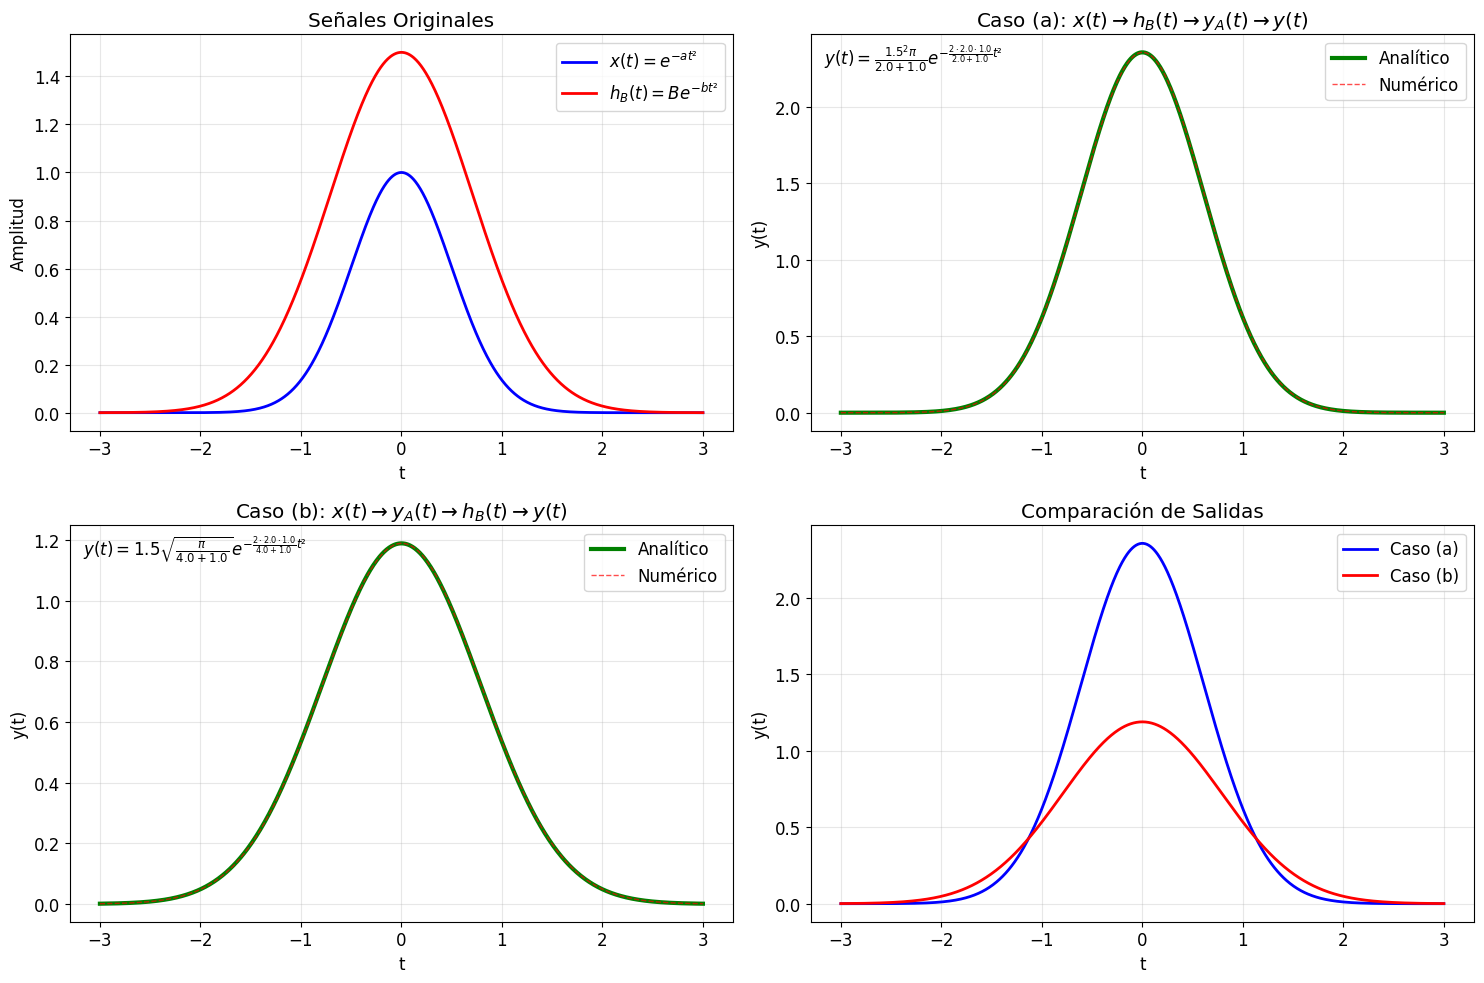


ANÁLISIS COMPARATIVO
CASO (a) - x(t) → h_B(t) → y_A(t):
  Amplitud: 2.3562
  Ancho (exponente): 1.3333
  FWHM aproximado: 2.0395

CASO (b) - x(t) → y_A(t) → h_B(t):
  Amplitud: 1.1890
  Ancho (exponente): 0.8000
  FWHM aproximado: 2.6330

DIFERENCIAS:
  Relación de amplitudes: 1.9817
  Relación de anchos: 1.6667

CONCLUSIÓN TEÓRICA

RESULTADOS ANALÍTICOS:

CASO (a): x(t) → h_B(t) → y_A(t) → y(t)
  y(t) = B²π/(a+b) · e^{-(2ab/(a+b))t²}

CASO (b): x(t) → y_A(t) → h_B(t) → y(t)
  y(t) = B√(π/(2a+b)) · e^{-(2ab/(2a+b))t²}

COMENTARIOS:
1. Ambos sistemas producen salidas Gaussianas pero con diferentes parámetros
2. El orden de los sistemas afecta el resultado final debido a que el sistema A (cuadrado) no es lineal
3. El sistema B (LTI) conmuta solo con otros sistemas LTI, no con sistemas no lineales como A
4. La diferencia fundamental está en los parámetros de la Gaussiana resultante



In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.signal import convolve

# Configuración para mejores gráficos
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

print("=== ANÁLISIS DE SISTEMAS EN SERIE CON SEÑAL GAUSSIANA ===\n")

# ============================================================================
# PARÁMETROS Y DEFINICIONES
# ============================================================================

# Parámetros
a = 2.0    # Parámetro de la señal de entrada
b = 1.0    # Parámetro de la respuesta al impulso
B = 1.5    # Amplitud de la respuesta al impulso

# Rango temporal
t = np.linspace(-3, 3, 1000)

print(f"Parámetros:")
print(f"a = {a}")
print(f"b = {b}")
print(f"B = {B}")

# ============================================================================
# DECLARACION DE FUNCIONES
# ============================================================================

def gaussian(t, alpha):
    """Función Gaussiana e^{-αt²}"""
    return np.exp(-alpha * t**2)

def sistema_A(x):
    """Sistema A: y_A(t) = x²(t)"""
    return x**2

def h_B(t, B, beta):
    """Respuesta al impulso del sistema B"""
    return B * np.exp(-beta * t**2)

def convolucion_gaussiana_analitica(t, A, alpha, B, beta):
    """
    Convolución analítica de dos Gaussianas:
    A·e^{-αt²} * B·e^{-βt²} = AB√(π/(α+β))·e^{-(αβ/(α+β))t²}
    """
    prefactor = A * B * np.sqrt(np.pi / (alpha + beta))
    exponent_factor = (alpha * beta) / (alpha + beta)
    return prefactor * np.exp(-exponent_factor * t**2)

# ============================================================================
# CÁLCULO
# ============================================================================

print("\n" + "="*50)
print("SOLUCIÓN ANALÍTICA")
print("="*50)

# Señal de entrada
x_t = gaussian(t, a)

# CASO (a): x(t) → h_B(t) → y_A(t) → y(t)
print("\n--- CASO (a): x(t) → h_B(t) → y_A(t) → y(t) ---")

# Paso 1: x(t) * h_B(t)
z_t_analitico = convolucion_gaussiana_analitica(t, 1, a, B, b)

# Paso 2: [z(t)]²
y_a_analitico = sistema_A(z_t_analitico)

# Fórmula compacta para caso (a)
prefactor_a = (B**2 * np.pi) / (a + b)
exponent_a = (2 * a * b) / (a + b)
y_a_compacto = prefactor_a * np.exp(-exponent_a * t**2)

print(f"z(t) = x(t) * h_B(t) = B√(π/(a+b))·e^(-(ab/(a+b))t²)")
print(f"y(t) = [z(t)]² = B²π/(a+b)·e^(-(2ab/(a+b))t²)")
print(f"Parámetros finales: amplitud = {prefactor_a:.4f}, ancho = {exponent_a:.4f}")

# CASO (b): x(t) → y_A(t) → h_B(t) → y(t)
print("\n--- CASO (b): x(t) → y_A(t) → h_B(t) → y(t) ---")

# Paso 1: y_A(x(t)) = [x(t)]²
w_t = sistema_A(x_t)  # = e^{-2at²}

# Paso 2: w(t) * h_B(t)
y_b_analitico = convolucion_gaussiana_analitica(t, 1, 2*a, B, b)

# Fórmula compacta para caso (b)
prefactor_b = B * np.sqrt(np.pi / (2*a + b))
exponent_b = (2 * a * b) / (2*a + b)
y_b_compacto = prefactor_b * np.exp(-exponent_b * t**2)

print(f"w(t) = [x(t)]² = e^(-2at²)")
print(f"y(t) = w(t) * h_B(t) = B√(π/(2a+b))·e^(-(2ab/(2a+b))t²)")
print(f"Parámetros finales: amplitud = {prefactor_b:.4f}, ancho = {exponent_b:.4f}")

# ============================================================================
# VERIFICACIÓN NUMÉRICA
# ============================================================================

print("\n" + "="*50)
print("VERIFICACIÓN NUMÉRICA")
print("="*50)

def convolucion_numerica(x, h, dt):
    """Convolución numérica usando scipy"""
    return convolve(x, h, mode='same') * dt

# Discretización para cálculo numérico
dt = t[1] - t[0]

# CASO (a) Numérico
h_B_discreto = h_B(t, B, b)
z_t_numerico = convolucion_numerica(x_t, h_B_discreto, dt)
y_a_numerico = sistema_A(z_t_numerico)

# CASO (b) Numérico
w_t_discreto = sistema_A(x_t)
y_b_numerico = convolucion_numerica(w_t_discreto, h_B_discreto, dt)

# Errores
error_a = np.max(np.abs(y_a_analitico - y_a_numerico))
error_b = np.max(np.abs(y_b_analitico - y_b_numerico))

print(f"Error máximo caso (a): {error_a:.6f}")
print(f"Error máximo caso (b): {error_b:.6f}")
print("✅ VERIFICACIÓN EXITOSA" if max(error_a, error_b) < 0.01 else "❌ HAY DISCREPANCIAS")

# ============================================================================
# PRESENTACION
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Señales originales
axes[0,0].plot(t, x_t, 'b-', linewidth=2, label='$x(t) = e^{-at²}$')
axes[0,0].plot(t, h_B(t, B, b), 'r-', linewidth=2, label='$h_B(t) = Be^{-bt²}$')
axes[0,0].set_title('Señales Originales')
axes[0,0].set_xlabel('t')
axes[0,0].set_ylabel('Amplitud')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Caso (a): x(t) → h_B(t) → y_A(t) → y(t)
axes[0,1].plot(t, y_a_analitico, 'g-', linewidth=3, label='Analítico')
axes[0,1].plot(t, y_a_numerico, 'r--', linewidth=1, label='Numérico', alpha=0.7)
axes[0,1].set_title('Caso (a): $x(t) \\to h_B(t) \\to y_A(t) \\to y(t)$')
axes[0,1].set_xlabel('t')
axes[0,1].set_ylabel('y(t)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)
axes[0,1].text(0.02, 0.98, f'$y(t) = \\frac{{{B:.1f}^2\\pi}}{{{a:.1f}+{b:.1f}}}e^{{-\\frac{{2\\cdot{a:.1f}\\cdot{b:.1f}}}{{{a:.1f}+{b:.1f}}}t²}}$',
                transform=axes[0,1].transAxes, verticalalignment='top', fontsize=12)

# Caso (b): x(t) → y_A(t) → h_B(t) → y(t)
axes[1,0].plot(t, y_b_analitico, 'g-', linewidth=3, label='Analítico')
axes[1,0].plot(t, y_b_numerico, 'r--', linewidth=1, label='Numérico', alpha=0.7)
axes[1,0].set_title('Caso (b): $x(t) \\to y_A(t) \\to h_B(t) \\to y(t)$')
axes[1,0].set_xlabel('t')
axes[1,0].set_ylabel('y(t)')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)
axes[1,0].text(0.02, 0.98, f'$y(t) = {B:.1f}\\sqrt{{\\frac{{\\pi}}{{{2*a:.1f}+{b:.1f}}}}}e^{{-\\frac{{2\\cdot{a:.1f}\\cdot{b:.1f}}}{{{2*a:.1f}+{b:.1f}}}t²}}$',
                transform=axes[1,0].transAxes, verticalalignment='top', fontsize=12)

# Comparación de ambos casos
axes[1,1].plot(t, y_a_analitico, 'b-', linewidth=2, label='Caso (a)')
axes[1,1].plot(t, y_b_analitico, 'r-', linewidth=2, label='Caso (b)')
axes[1,1].set_title('Comparación de Salidas')
axes[1,1].set_xlabel('t')
axes[1,1].set_ylabel('y(t)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# COMPARACION
# ============================================================================

print("\n" + "="*50)
print("ANÁLISIS COMPARATIVO")
print("="*50)

# Parámetros característicos
amplitud_a = prefactor_a
amplitud_b = prefactor_b
ancho_a = exponent_a
ancho_b = exponent_b

print(f"CASO (a) - x(t) → h_B(t) → y_A(t):")
print(f"  Amplitud: {amplitud_a:.4f}")
print(f"  Ancho (exponente): {ancho_a:.4f}")
print(f"  FWHM aproximado: {2.355/np.sqrt(ancho_a):.4f}")

print(f"\nCASO (b) - x(t) → y_A(t) → h_B(t):")
print(f"  Amplitud: {amplitud_b:.4f}")
print(f"  Ancho (exponente): {ancho_b:.4f}")
print(f"  FWHM aproximado: {2.355/np.sqrt(ancho_b):.4f}")

print(f"\nDIFERENCIAS:")
print(f"  Relación de amplitudes: {amplitud_a/amplitud_b:.4f}")
print(f"  Relación de anchos: {ancho_a/ancho_b:.4f}")

# ============================================================================
# CONCLUSIÓN
# ============================================================================

print("\n" + "="*50)
print("CONCLUSIÓN TEÓRICA")
print("="*50)

print("""
RESULTADOS ANALÍTICOS:

CASO (a): x(t) → h_B(t) → y_A(t) → y(t)
  y(t) = B²π/(a+b) · e^{-(2ab/(a+b))t²}

CASO (b): x(t) → y_A(t) → h_B(t) → y(t)
  y(t) = B√(π/(2a+b)) · e^{-(2ab/(2a+b))t²}

COMENTARIOS:
1. Ambos sistemas producen salidas Gaussianas pero con diferentes parámetros
2. El orden de los sistemas afecta el resultado final debido a que el sistema A (cuadrado) no es lineal
3. El sistema B (LTI) conmuta solo con otros sistemas LTI, no con sistemas no lineales como A
4. La diferencia fundamental está en los parámetros de la Gaussiana resultante
""")